# Plot COVID-19 data on a specific department

In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
pd.plotting.register_matplotlib_converters()

In [3]:
dep = "31"  # Haute-Garonne
figsize = (15, 10)

In [4]:
covid_url = (
    "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
)

#### <br> Load table with COVID-19 data (figures by dates)

In [5]:
df = pd.read_csv(covid_url, sep=";", parse_dates=True, index_col=2)
df = df.query("sexe == 0")  # sum male/female
df.drop(columns=["sexe"], inplace=True)
df.sort_index(inplace=True)
df.rename(
    columns={
        "hosp": "Number of people hospitalized",
        "rea": "Number of people in resuscitation or critical care",
        "rad": "Total amount of patients that returned home",
        "dc": "Total amount of deaths",
    },
    inplace=True,
)
df.head(2)

,dep,Number of people hospitalized,Number of people in resuscitation or critical care,Total amount of patients that returned home,Total amount of deaths
jour,,,,,
2020-03-18,01,2,0,1,0
2020-03-18,02,41,10,18,11


In [6]:
sdf = df[df["dep"] == dep]

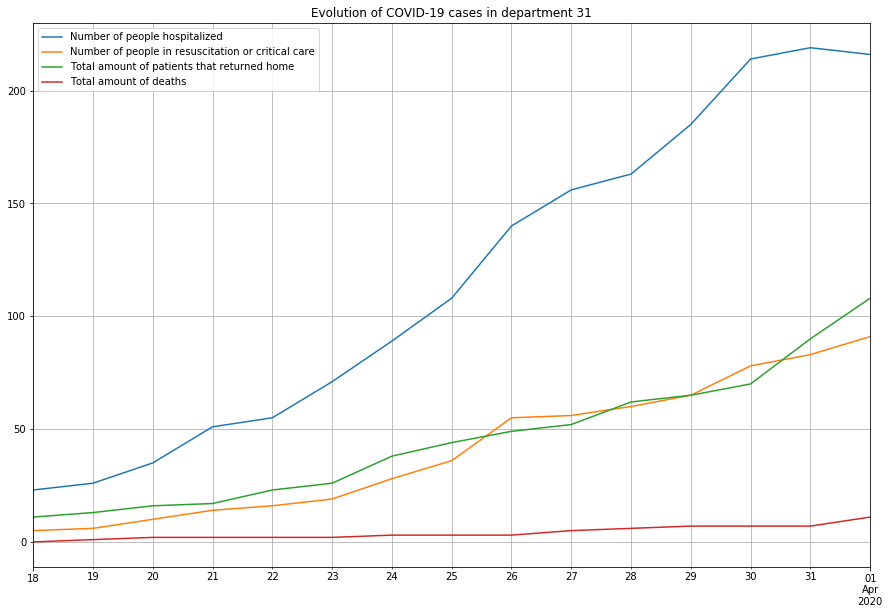

In [7]:
f, ax = plt.subplots(figsize=figsize)
sdf.plot(ax=ax, subplots=False, sharex=True, grid=True)
ax.grid(True, which="both")
ax.set_title("Evolution of COVID-19 cases in department " + dep)
img_name = dep + ".png"
ax.xaxis.set_label_text("")
f.savefig(img_name)
plt.show()